# Custom Datasets

Khác với các bộ dữ liệu có sẵn trên Pytorch, để có thể sử dụng bộ dữ liệu ngoài thì cần phải thêm một số bước tiền xử lý dữ liệu. Dựa vào kiểu dữ liệu, chúng ta cần xem kỹ các thư viện liên quan đến kiểu dữ liệu đang xử lý

In [22]:
import torch
from torch import nn

torch.__version__

'2.5.1+cu124'

In [23]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

## 1. Lấy data

Các thực nghiệm sẽ được thực hiện trên bộ dữ liệu ngoài được trích xuất từ bộ dữ liệu Food101 có sẵn trên pytorch

In [24]:
import requests
import zipfile
from pathlib import Path

data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

if image_path.is_dir():
    print(f"{image_path} directory already exists")
else:
    print(f"Creating directory {image_path}")
    image_path.mkdir(parents=True, exist_ok=True)

with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    f.write(request.content)

with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
    print("Unzipping data...")
    zip_ref.extractall(image_path)

data/pizza_steak_sushi directory already exists
Unzipping data...


## 2. Chuẩn bị data

In [25]:
import os

def walk_through_dir(dir_path):
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.


In [26]:
train_dir = image_path / "train"
test_dir = image_path / "test"

In [27]:
import random
from PIL import Image

random.seed(42)

image_path_list = list(image_path.glob("*/*/*.jpg"))
image_path_list[:10]

[PosixPath('data/pizza_steak_sushi/train/steak/2979061.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/1257104.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/482022.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/165639.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/1598345.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/167069.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/1736968.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/3577618.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/2017387.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/2013535.jpg')]

Image size: (512, 287)
Image mode: RGB


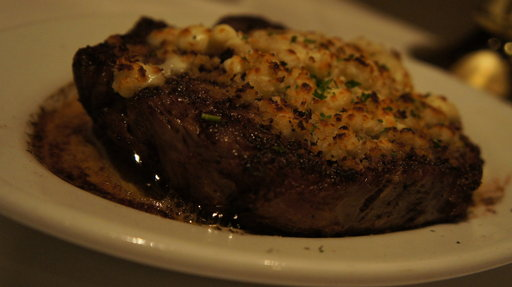

In [28]:
random_image_path = random.choice(image_path_list)
img = Image.open(random_image_path)
print(f"Image size: {img.size}")
print(f"Image mode: {img.mode}")
img

In [29]:
import numpy as np
import matplotlib.pyplot as plt

img_as_np = np.asarray(img)
print(f"Image type: {type(img_as_np)}")
print(f"Image shape: {img_as_np.shape}")

Image type: <class 'numpy.ndarray'>
Image shape: (287, 512, 3)


## 3. Chuyển dữ liệu sang tensor

Tạo một hàm dựa trên module transforms có sẵn trong pytorch giúp thực hiện các tiền xử lý dữ liệu cần thiết để có thể sử dụng trong pytorch

In [30]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

data_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

In [31]:
data_transform(img).shape

torch.Size([3, 64, 64])

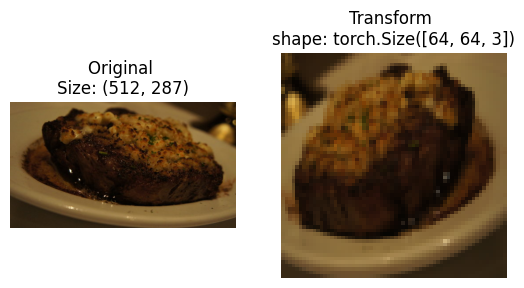

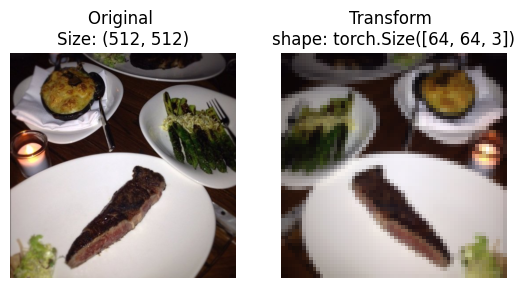

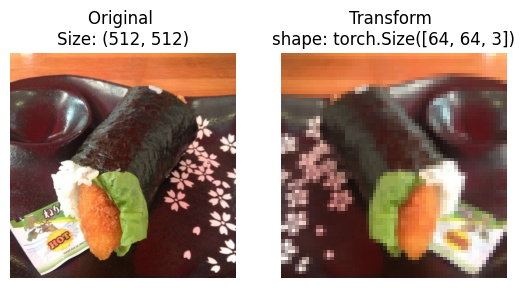

In [32]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)

    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(nrows = 1, ncols = 2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            transformed_image = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transform \nshape: {transformed_image.shape}")
            ax[1].axis(False)

plot_transformed_images(image_paths=image_path_list,
                        transform=data_transform)

In [33]:
train_data = datasets.ImageFolder(root = train_dir,
                                  transform=data_transform,
                                  target_transform=None)

test_data = datasets.ImageFolder(root = test_dir,
                                 transform=data_transform)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [34]:
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

## 4. Tạo DataLoader

In [35]:
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=32,
                              num_workers=2,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=32,
                             num_workers=2,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x78b30dbde4d0>,
 <torch.utils.data.dataloader.DataLoader at 0x78b30daf5410>)

## 5. Tạo Custom dataset class

In [36]:
import os
import pathlib
from PIL import Image
from torch.utils.data import Dataset
from typing import Tuple, Dict, List

In [37]:
target_directory = train_dir

def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
    ''' Trích xuất các nhãn dữ liệu dựa trên đường dẫn dữ liệu'''
    classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())
    if not classes:
        raise FileNotFoundError(f"Không tìm thấy các thư mục con trong {directory}.")
    else:
        class_to_idx = {cls_name: i for i, cls_name in enumerate(classes)}

    return classes, class_to_idx

In [38]:
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [39]:
class ImageFolderCustom(Dataset):
    def __init__(self,
                 image_dir: str,
                 transform: transforms.Compose):
        self.paths = list(pathlib.Path(image_dir).glob("*/*.jpg"))
        self.classes, self.class_to_idx = find_classes(image_dir)
        self.transform = transform

    def __len__(self) -> int:
        """ Trả về số sample"""
        return len(self.paths)

    def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
        """ Trả về một sample xác định"""
        image_path = self.paths[index]
        image = Image.open(image_path)
        class_name = image_path.parent.stem
        class_idx = self.class_to_idx[class_name]

        if self.transform:
            return self.transform(image), class_idx
        else:
            return image, class_idx

    def load_image(self, index: int) -> Image.Image:
        image_path = self.paths[index]
        image = Image.open(image_path)
        return image

In [40]:
train_data_custom = ImageFolderCustom(image_dir=train_dir,
                                      transform=data_transform)

test_data_custom = ImageFolderCustom(image_dir=test_dir,
                                     transform=data_transform)

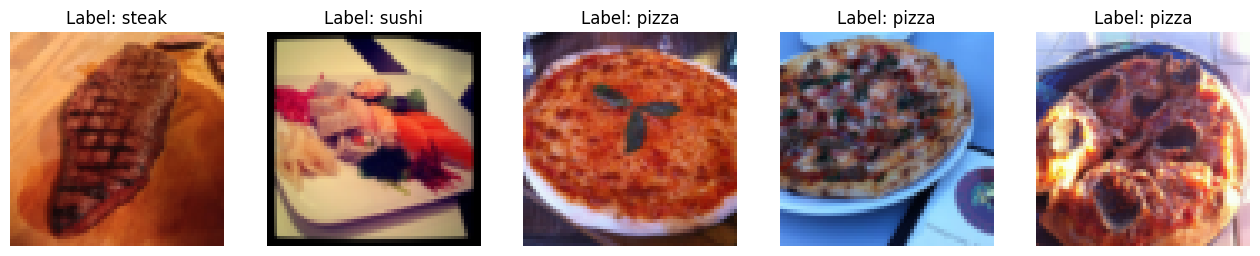

In [41]:
def display_random_image(dataset: torch.utils.data.Dataset,
                         classes: List[str],
                         n: int = 10,
                         display_shape: bool = True,
                         seed: int = 42):
    random.seed(seed)
    random_samples_idx = random.sample(range(len(dataset)), k=n)

    plt.figure(figsize=(16, 8))

    for i, idx in enumerate(random_samples_idx):
        image, label = dataset[idx]
        adjust_image = image.permute(1, 2, 0)
        plt.subplot(1, n, i + 1)
        plt.axis(False)
        plt.imshow(adjust_image)
        plt.title(f"Label: {classes[label]}")
        if display_shape:
            plt.title(f"Shape: {adjust_image.shape}")

display_random_image(dataset=train_data_custom,
                     classes=train_data_custom.classes,
                     n=5,
                     display_shape=False,
                     seed = 1)

## 6. Data Augmentation

Data augmentation là một tập các phương pháp điều chỉnh dữ liệu gốc để đa dạng hóa dữ liệu trong quá trình huấn luyện.

Tham khảo: https://pytorch.org/vision/main/transforms.html#

In [44]:
train_transform_aug = transforms.Compose([
                                        transforms.Resize((224, 224)),
                                        transforms.TrivialAugmentWide(num_magnitude_bins=31),
                                        transforms.ToTensor()
                                        ])

test_transform_aug = transforms.Compose([
                                        transforms.Resize((224, 224)),
                                        transforms.ToTensor()
                                        ])
